In [65]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [66]:
# Read the csv file 
df=pd.read_csv("playstore.csv")

In [3]:
#Give the glance of the Dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
df.shape

(10841, 13)

<AxesSubplot:>

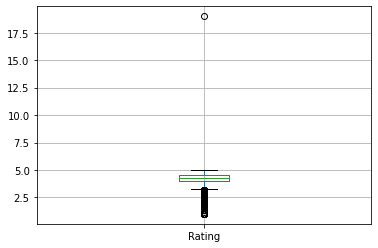

In [6]:
df.boxplot('Rating')
#As we know maximum rating we can have is 5 so any thing above 5 will be an outliers.

In [7]:
# we are finding null values in the rating column
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#wherever there is null values we are droping those records 
df.dropna(subset=['Rating'], inplace=True)

In [9]:
df['Rating'].isnull().sum()

0

In [10]:
df[df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#Here we are dropping the outlier that was present in the Rating column
df.drop([10472],inplace=True)

<AxesSubplot:>

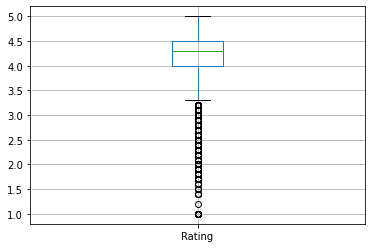

In [12]:
#The outlier is been dropped and now we can see the graph showing the maximum rating of 5
df.boxplot('Rating')

In [13]:
# The null values in the Android version record is filled with the mode of the columns
df["Android Ver"].fillna(str(df["Android Ver"].mode()),inplace=True)

In [14]:
df['Android Ver'].head()

0    4.0.3 and up
1    4.0.3 and up
2    4.0.3 and up
3      4.2 and up
4      4.4 and up
Name: Android Ver, dtype: object

In [15]:
#Now we can see 0 null values in the Android Version Record 
df["Android Ver"].isnull().sum()

0

<AxesSubplot:>

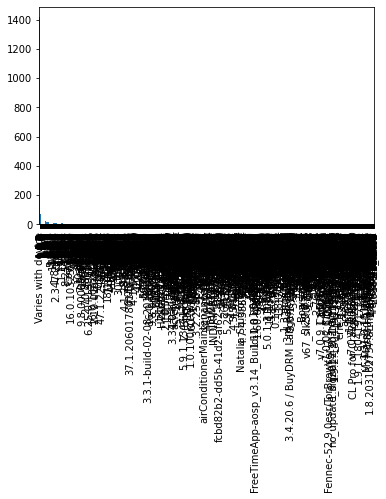

In [16]:
df["Current Ver"].value_counts().plot.bar()

<AxesSubplot:xlabel='Current Ver'>

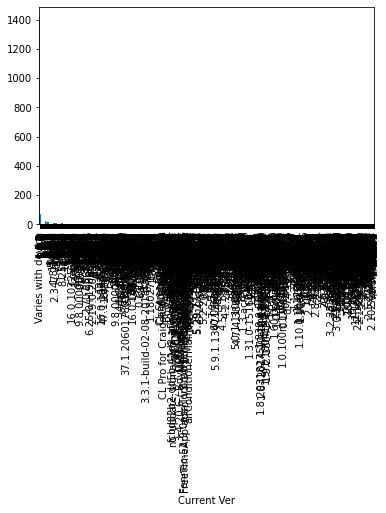

In [17]:
df.groupby(['Current Ver'])['Current Ver'].count().sort_values(ascending=False).plot.bar()

In [18]:
#Current Version is also filled with the most frequent record 
df["Current Ver"].fillna(str(df["Current Ver"].mode()),inplace=True)

In [19]:
df["Current Ver"].isnull().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [21]:
#In our Dataset,there are columns with special characters ,so we have to remove those character
df["Installs"]=df["Installs"].apply(lambda x:str(x).replace("+",' ') if '+' in str(x) else str(x))
df["Installs"]=df["Installs"].apply(lambda x:str(x).replace(","," ")if "," in str(x) else str(x))
df["Installs"].head()
df["Installs"].value_counts()

1 000 000         1577
10 000 000        1252
100 000           1150
10 000            1010
5 000 000          752
1 000              713
500 000            538
50 000             467
5 000              432
100 000 000        409
100                309
50 000 000         289
500                201
500 000 000         72
10                  69
1 000 000 000       58
50                  56
5                    9
1                    3
Name: Installs, dtype: int64

In [22]:
df["Price"]=df["Price"].apply(lambda x:str(x).replace("$"," ") if "$" in str(x) else str(x))

In [23]:
df["Price"]

0        0
1        0
2        0
3        0
4        0
        ..
10834    0
10836    0
10837    0
10839    0
10840    0
Name: Price, Length: 9366, dtype: object

In [24]:
#whereve there is a nan value we will replace it with 200 rupees
df["Price"].fillna(200, inplace =True)

In [25]:
df["Price"].isnull().sum()

0

In [26]:
df["Price"].value_counts()

0         8719
 2.99      114
 0.99      107
 4.99       70
 1.99       59
          ... 
 19.40       1
 18.99       1
 15.99       1
 4.77        1
 3.88        1
Name: Price, Length: 73, dtype: int64

Text(0, 0.5, 'App')

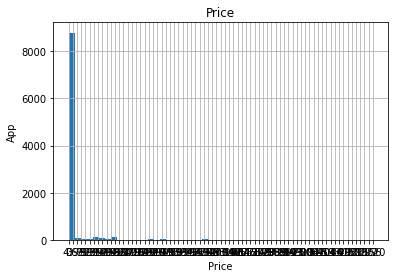

In [27]:
figure=df.Price.hist(bins=50)
figure.set_title('Price')
figure.set_xlabel('Price')
figure.set_ylabel('App')

In [28]:
df["Reviews"]=pd.to_numeric(df["Reviews"],errors='coerce')
df["Installs"]=pd.to_numeric(df["Installs"],errors='coerce')
df["Price"]=pd.to_numeric(df["Price"],errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        647 non-null    float64
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


In [30]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [31]:
df["Price"].describe()

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

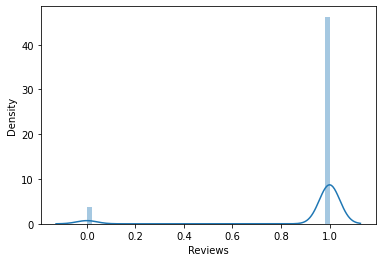

In [32]:
sns.distplot(df["Reviews"]<1000000)

Text(0, 0.5, 'App')

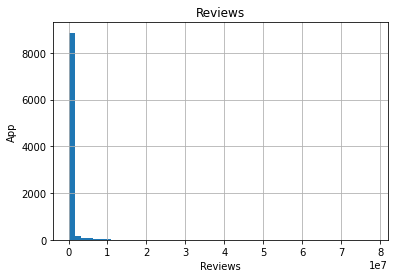

In [33]:
figure=df.Reviews.hist(bins=50)
figure.set_title('Reviews')
figure.set_xlabel('Reviews')
figure.set_ylabel('App')

<AxesSubplot:>

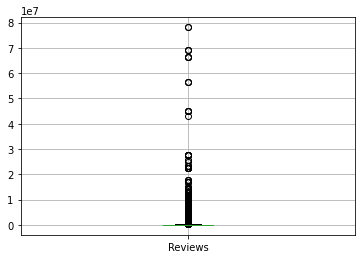

In [34]:
df.boxplot("Reviews")

In [35]:
#we have drop the records that were having Reviews more the 1000000
Reviews = df[ df['Reviews']>1000000 ].index
df.drop(Reviews, inplace = True)

Text(0, 0.5, 'App')

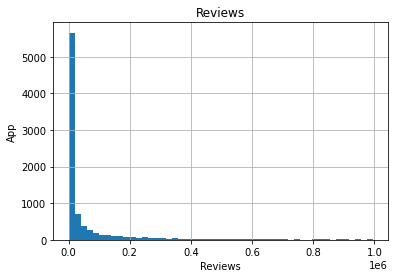

In [36]:
figure=df.Reviews.hist(bins=50)
figure.set_title('Reviews')
figure.set_xlabel('Reviews')
figure.set_ylabel('App')

In [37]:
df["Reviews"].describe()

count      8662.000000
mean      68164.619026
std      156130.191663
min           1.000000
25%         142.000000
50%        3595.500000
75%       45720.750000
max      995002.000000
Name: Reviews, dtype: float64

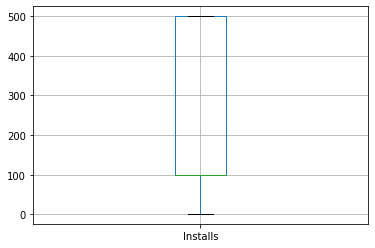

In [38]:

figure=df.boxplot(column="Installs")
df["Installs"].fillna(str(df["Installs"].mean()),inplace=True)

In [39]:
#np.percentile(df.Installs, 20)

In [40]:
## df["Installs"].value_counts()
df["Installs"].isnull().sum()

0

In [41]:
df["Installs"].describe()

count                  8662
unique                    7
top       208.5595054095827
freq                   8015
Name: Installs, dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8662 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8662 non-null   object 
 1   Category        8662 non-null   object 
 2   Rating          8662 non-null   float64
 3   Reviews         8662 non-null   int64  
 4   Size            8662 non-null   float64
 5   Installs        8662 non-null   object 
 6   Type            8662 non-null   object 
 7   Price           8662 non-null   float64
 8   Content Rating  8662 non-null   object 
 9   Genres          8662 non-null   object 
 10  Last Updated    8662 non-null   object 
 11  Current Ver     8662 non-null   object 
 12  Android Ver     8662 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 947.4+ KB


In [43]:
#np.percentile(df.Installs,95)
df["Installs"]=pd.to_numeric(df["Installs"])

In [44]:
uppper_boundary=df['Installs'].mean() + 3* df['Installs'].std()
lower_boundary=df['Installs'].mean() - 3* df['Installs'].std()
print(lower_boundary), print(uppper_boundary),print(df['Installs'].mean())

46.27415504840107
370.8448557707644
208.55950540958273


(None, None, None)

In [45]:
IQR=df.Installs.quantile(0.75)-df.Installs.quantile(0.25)
lower_bridge=df['Installs'].quantile(0.25)-(IQR*3)
upper_bridge=df['Installs'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

208.5595054095827
208.5595054095827


(None, None)

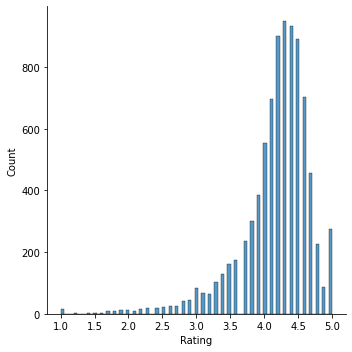

In [46]:
# The graph of Rating is moslty left skewed or negative skewed .most of the rating is between 4 and 4.5 
sns.displot(df.Rating)
plt.show()

In [47]:
df.Rating.value_counts()

4.3    949
4.4    932
4.2    900
4.5    891
4.6    703
4.1    696
4.0    554
4.7    455
3.9    385
3.8    302
5.0    274
3.7    237
4.8    227
3.6    174
3.5    163
3.4    128
3.3    102
4.9     87
3.0     83
3.1     69
3.2     64
2.9     45
2.8     42
2.7     25
2.6     25
2.5     21
2.3     20
2.4     19
1.0     16
2.2     14
1.9     13
2.0     12
2.1      8
1.8      8
1.7      8
1.6      4
1.5      3
1.4      3
1.2      1
Name: Rating, dtype: int64

In [48]:
#Here we are removing the records that have less rating and does give any value-added feedback
df = df[~df['Rating'].isin([1.2,1.4,1.5,1.6,1.7,1.8,2.1,2.0,1.9,2.2,1.0,2.4,2.3,])]
df.reset_index(inplace=True, drop=True)

In [49]:
df.Rating.value_counts()

4.3    949
4.4    932
4.2    900
4.5    891
4.6    703
4.1    696
4.0    554
4.7    455
3.9    385
3.8    302
5.0    274
3.7    237
4.8    227
3.6    174
3.5    163
3.4    128
3.3    102
4.9     87
3.0     83
3.1     69
3.2     64
2.9     45
2.8     42
2.7     25
2.6     25
2.5     21
Name: Rating, dtype: int64

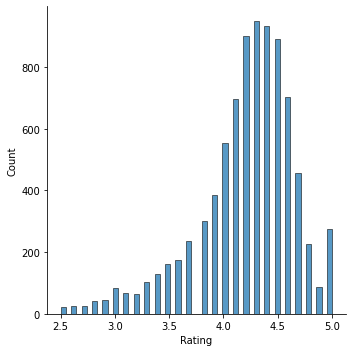

In [50]:
# After Removin those records.The graph look moslty a Gaussian Distribution Graph
sns.displot(df.Rating)
plt.show()

## Effect of Price on Rating

Text(0, 0.5, 'Price')

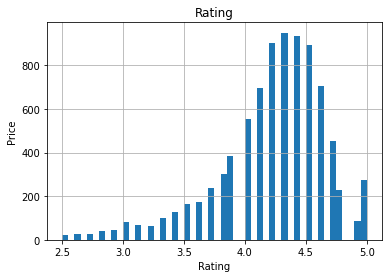

In [51]:
figure=df.Rating.hist(bins=50)
figure.set_title("Rating")
figure.set_xlabel("Rating")
figure.set_ylabel("Price")

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


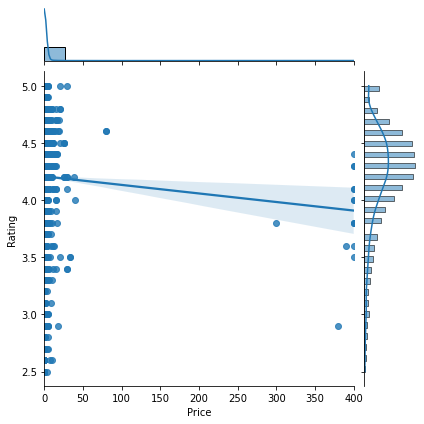

In [52]:
sns.jointplot(df.Price, df.Rating, kind = "reg")
plt.show()

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


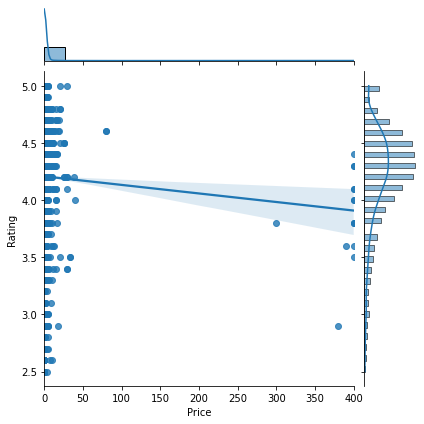

In [53]:
# Have drop the record where the price was 0
Price= df[ df['Price'] == 0 ].index
df.drop(Price)
sns.jointplot(df.Price, df.Rating, kind = "reg")
plt.show()

#### Here we can see as the rating is increasing the price of the following App is also increasing Simultaneosly

## Effect of Size on Rating

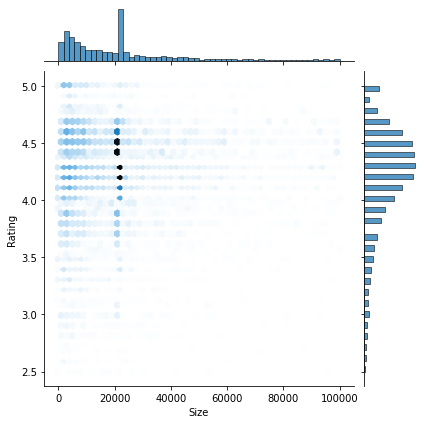

In [54]:
#Effect fo size on rating
sns.jointplot(x= 'Size',y='Rating' ,data=df,kind='hex')
plt.show()

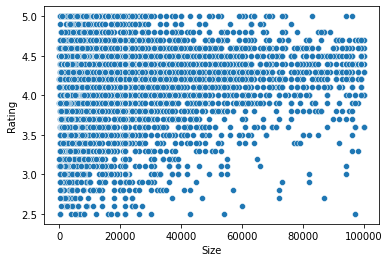

In [55]:
sns.scatterplot(x='Size', y='Rating',data=df)
plt.show()

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


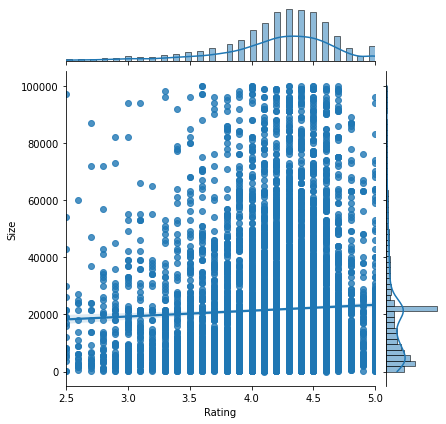

In [56]:
sns.jointplot(df.Rating, df.Size, kind = "reg")
plt.show()

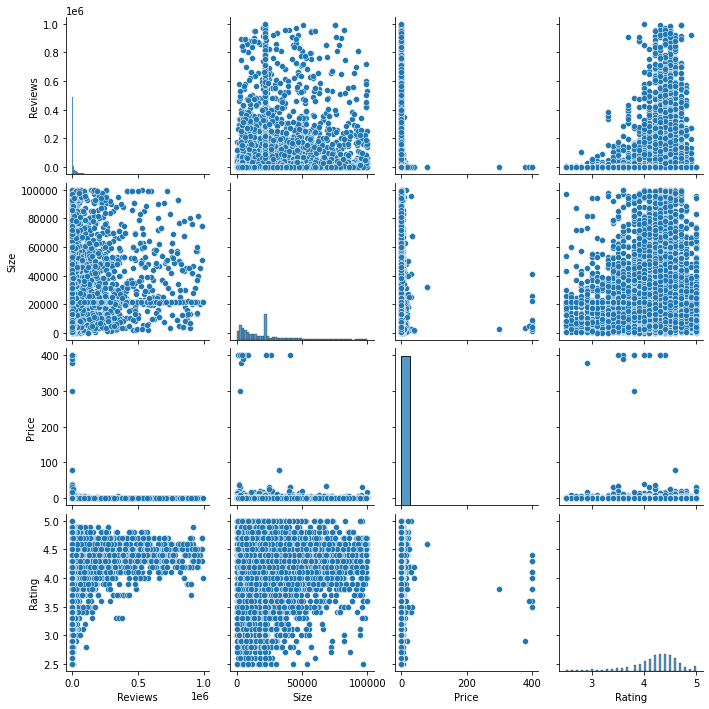

In [57]:
sns.pairplot(df[['Reviews', 'Size', 'Price','Rating']])
plt.show()

### this shows which features is highly correlated with each other.

In [58]:
df_content=df["Content Rating"].value_counts()

## Make a bar plot displaying the rating for each content rating


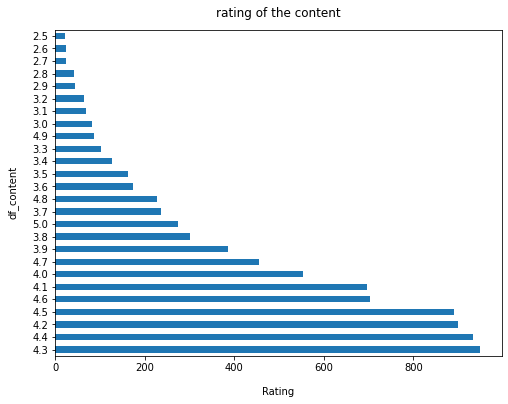

In [59]:
#just Tried
df["Rating"].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Rating", labelpad=14)
plt.ylabel("df_content", labelpad=14)
plt.title("rating of the content", y=1.02);

[None, None, None, None, None, None, None, None, None, None, None, None]

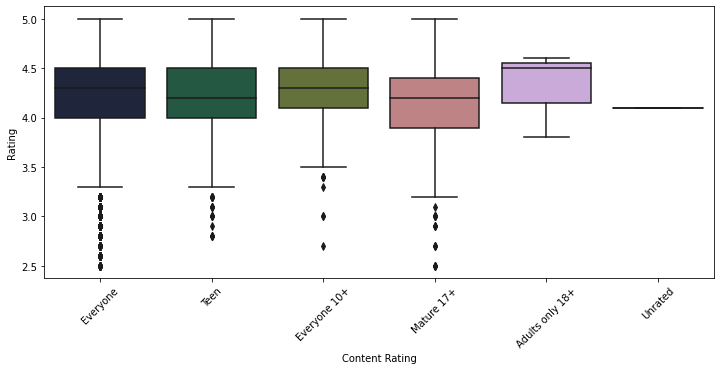

In [60]:
plt.figure(figsize=(12, 5))
s=sns.boxplot(x ='Content Rating', y ='Rating', data = df, palette ='cubehelix') 
plt.setp(s.get_xticklabels(), rotation=45)

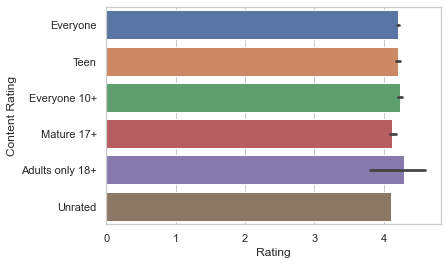

In [61]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Rating", y="Content Rating", data=df)

##  Bucketing


In [62]:
bins = [0, 25, 50, 75, 100]
df['binned'] = pd.cut(df['Size'], bins)



In [63]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,binned
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,208.559505,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,208.559505,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,208.559505,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,208.559505,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,208.559505,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN


<AxesSubplot:>

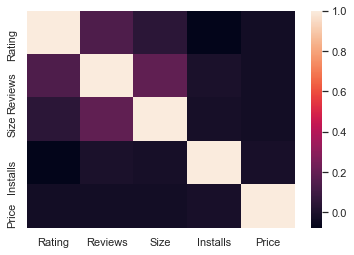

In [64]:
sns.heatmap(df.corr())